# Measure the radial velocity
This notebook interfaces with the Measure_RV.py code to measure the radial velocity of some stars. It uses the RVFitter class to do an MCMC fit.

In [11]:
import Measure_RV
import matplotlib.pyplot as plt
import logging
import triangle
import numpy as np
%matplotlib inline

logger = logging.getLogger()
logger.setLevel(logging.INFO)

7200
/Volumes/DATADRIVE/PhoenixGrid/CHIRON_Grid.hdf5


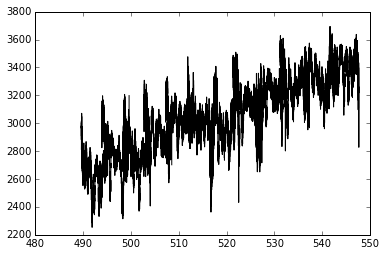

In [12]:
reload(Measure_RV)
fitter = Measure_RV.make_fitter('20140208/HIP_69475.fits')
for xi, yi in zip(fitter.x, fitter.y):
    plt.plot(xi, yi, 'k-')

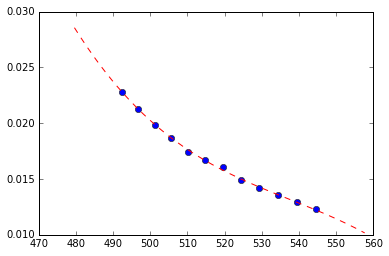

[47.657005384314374, 167.36877683348956, 0.5, 3569.5474382512875, 7200]


In [13]:
initial_pars = fitter.guess_fit_parameters()
#initial_pars = np.array([-7., 18., 0., 3220., 11850.])
print(initial_pars)

In [14]:
model_orders = fitter.model(initial_pars, fitter.x)
scale_factor = fitter._fit_factor(fitter.x, model_orders, fitter.y)
print(scale_factor)
#%prun fitter._fit_factor(fitter.x, model_orders, fitter.y)

[43.841535732237389, 47.095909012638913, 50.316587104336577, 53.519806675371001, 56.727858390554502, 59.962756309192628, 63.250408566028455, 66.617591900047046, 70.096000873170851, 73.720202103629163, 77.527596601095865, 81.562574427028267]


In [8]:
%prun fitter._lnlike(initial_pars)

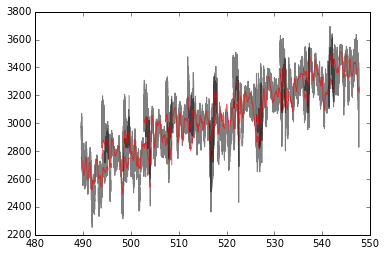

In [16]:
orders = Measure_RV.HelperFunctions.ReadExtensionFits('20140208/HIP_50847.fits')

for xi, yi, model, f in zip(fitter.x, fitter.y, model_orders, scale_factor):
    
    plt.plot(xi, yi, 'k-', alpha=0.5)
    plt.plot(xi, model*f, 'r-', alpha=0.6)
plt.show()

In [23]:
fitter.fit(nwalkers=100, n_burn=100, n_prod=200, guess=False, initial_pars=initial_pars)

INFO:root:Done with burn-in iteration 1 / 100
INFO:root:Done with burn-in iteration 11 / 100
INFO:root:Done with burn-in iteration 21 / 100
INFO:root:Done with burn-in iteration 31 / 100
INFO:root:Done with burn-in iteration 41 / 100
INFO:root:Done with burn-in iteration 51 / 100
INFO:root:Done with burn-in iteration 61 / 100
INFO:root:Done with burn-in iteration 71 / 100
INFO:root:Done with burn-in iteration 81 / 100
INFO:root:Done with burn-in iteration 91 / 100


Running burn-in
Running production

INFO:root:Done with production iteration 1 / 200
INFO:root:Done with production iteration 11 / 200
INFO:root:Done with production iteration 21 / 200
INFO:root:Done with production iteration 31 / 200
INFO:root:Done with production iteration 41 / 200
INFO:root:Done with production iteration 51 / 200
INFO:root:Done with production iteration 61 / 200
INFO:root:Done with production iteration 71 / 200
INFO:root:Done with production iteration 81 / 200
INFO:root:Done with production iteration 91 / 200
INFO:root:Done with production iteration 101 / 200
INFO:root:Done with production iteration 111 / 200
INFO:root:Done with production iteration 121 / 200
INFO:root:Done with production iteration 131 / 200
INFO:root:Done with production iteration 141 / 200
INFO:root:Done with production iteration 151 / 200
INFO:root:Done with production iteration 161 / 200
INFO:root:Done with production iteration 171 / 200
INFO:root:Done with production iteration 181 / 200
INFO:root:Done with production iteration 1

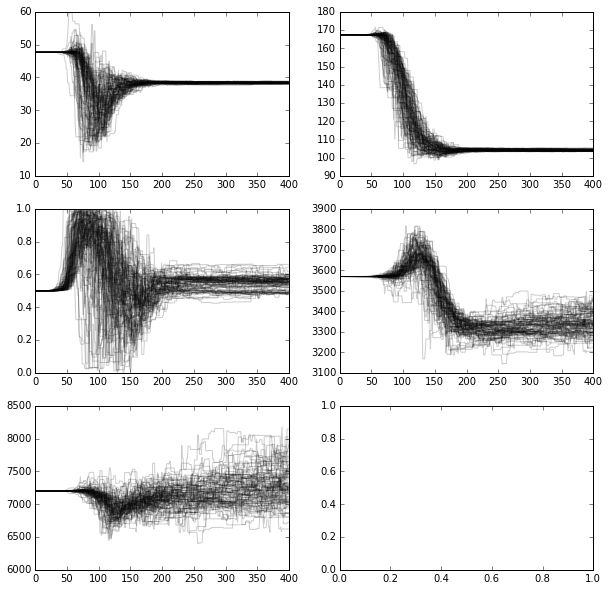

In [18]:
fig, axes = plt.subplots(3,2, figsize=(10, 10))
axes = axes.flatten()
for i in range(fitter.sampler.chain.shape[-1]):
    ax = axes[i]
    _ = ax.plot(fitter.sampler.chain[:, :, i].T, 'k-', alpha=0.2)
#_ = plt.plot(fitter.sampler.chain[:, :, 0].T, 'k-', alpha=0.2)#

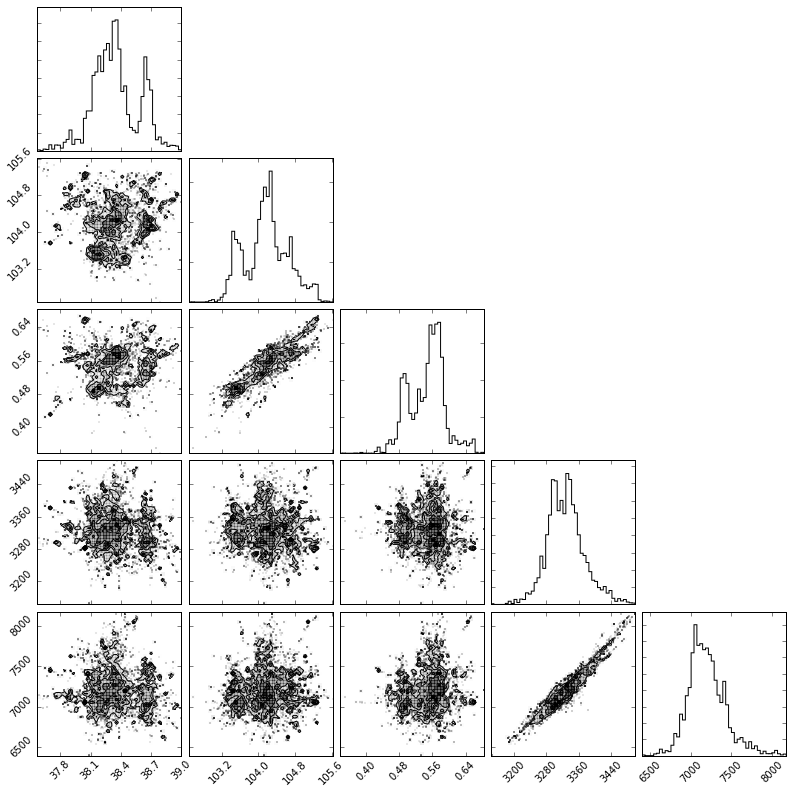

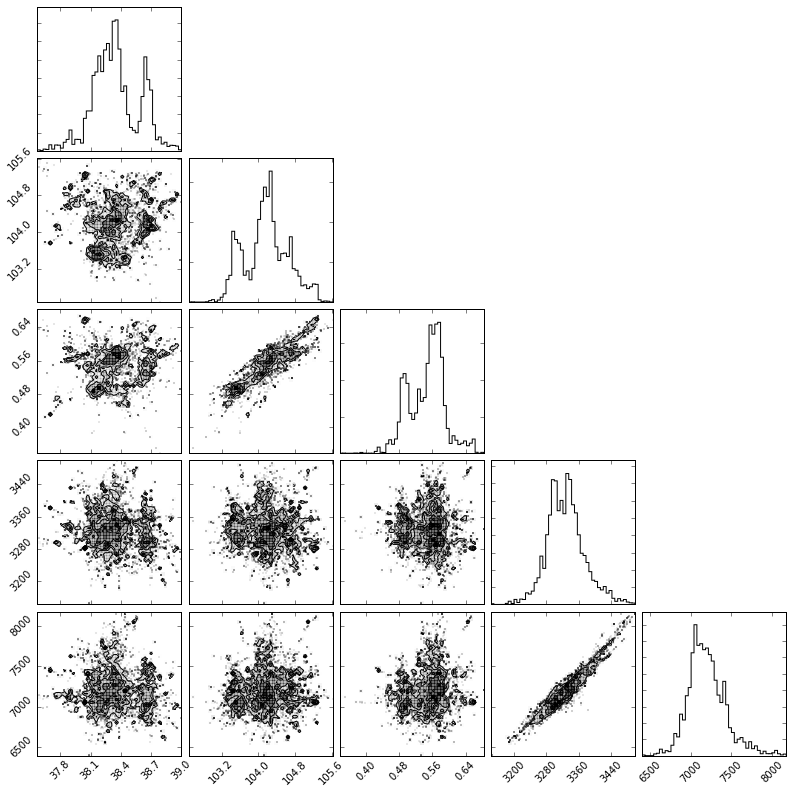

In [20]:

samples = fitter.sampler.chain[:, 200:, :].reshape((-1, fitter.sampler.chain.shape[-1]))
triangle.corner(samples)

<IPython.core.display.Javascript object>


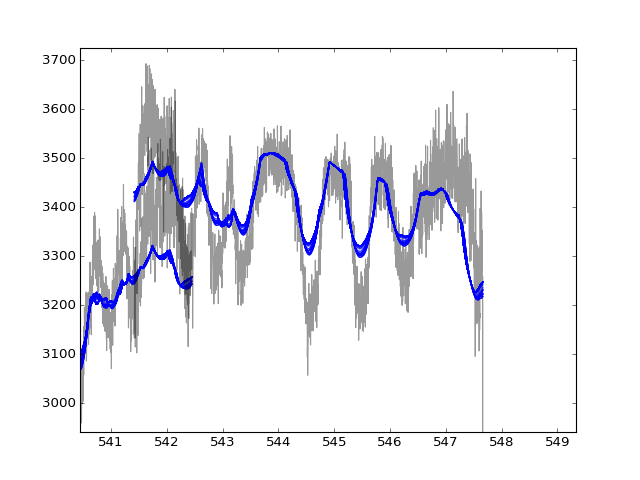

In [21]:
%matplotlib notebook
fitter.plot(alpha=0.4)

[ 52173.84747336  52036.19895889  51794.70393589 ...,  46915.64733286
  46639.99488113  46759.12915961]
[ 54352.95061208  54347.54818947  54342.24828887 ...,  50944.88123748
  50947.74993364  50948.1933389 ]
[ 288.0283194   287.38423972  286.45694997 ...,  295.30876807  294.76745885
  295.36358996]
[  57.23809772   64.6852475    79.0905837  ...,  186.16253138  213.57131713
  201.15003491]


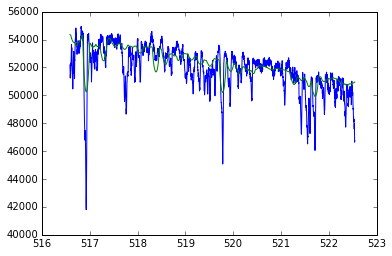

In [35]:
i = 12
print fitter.y[i]
print y_pred[i]
print fitter.yerr[i]
print (fitter.y[i] - y_pred[i])**2 / fitter.yerr[i]**2
plt.plot(fitter.x[i], fitter.y[i])
plt.plot(fitter.x[i], y_pred[i])

In [38]:
print(initial_pars)

[-13.235058325012394, 41.029072653035556, 0.5, 3304.2710854903576, 12000, -3.6150115895134648e-08, 5.798360480257152e-05, -0.031083264405581065, 5.5766214643256911]
